In [2]:
pip install matplotlib


Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 7.5/7.5 MB 973.1 kB/s eta 0:00:00
     ---------------------------------------- 2.1/2.1 MB 1.5 MB/s eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 1.5 MB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



     -------------------------------------- 429.4/429.4 kB 2.2 MB/s eta 0:00:00
     -------------------------------------- 55.4/55.4 kB 480.6 kB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Assuming insurance.csv is in the current working directory
data = pd.read_csv('insurance.csv')

# Display the first few rows of the dataset to understand its structure
print(data.head())


   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [24]:
# Extract the input features (X) and the target variable (y)
X = data[['children']]  # You can select other features as well if needed
y = data['charges']

# Convert X and y to NumPy arrays
X = np.array(X)
y = np.array(y).reshape(-1, 1)


In [25]:
class LinearRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros((n_features, 1))
        self.bias = 0

        for _ in range(self.n_iterations):
            y_predicted = np.dot(X, self.weights) + self.bias

            # Calculate gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias


In [26]:
model = LinearRegression()
model.fit(X, y)


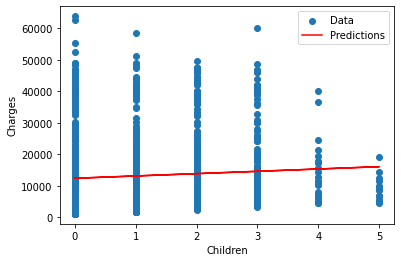

In [28]:
y_pred = model.predict(X)

plt.scatter(X, y, label="Data")
plt.plot(X, y_pred, color='red', label="Predictions")
plt.xlabel("Children")
plt.ylabel("Charges")
plt.legend()
plt.show()


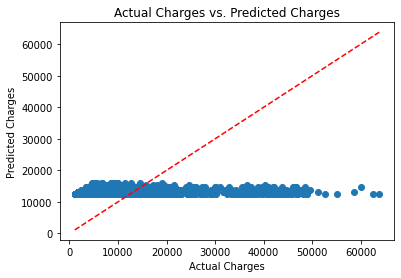

In [29]:
plt.scatter(y, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual Charges vs. Predicted Charges")
plt.show()
